In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-behaviour-score/Dev_data_to_be_shared.csv
/kaggle/input/credit-card-behaviour-score/validation_data_to_be_shared.csv


# Data importing

In [2]:
train = pd.read_csv("/kaggle/input/credit-card-behaviour-score/Dev_data_to_be_shared.csv")
test_val = pd.read_csv("/kaggle/input/credit-card-behaviour-score/validation_data_to_be_shared.csv")

In [3]:
train.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train.bad_flag.value_counts()

bad_flag
0    95434
1     1372
Name: count, dtype: int64

In [5]:
print(train.dtypes)


account_number               int64
bad_flag                     int64
onus_attribute_1           float64
transaction_attribute_1    float64
transaction_attribute_2    float64
                            ...   
onus_attribute_44          float64
onus_attribute_45          float64
onus_attribute_46          float64
onus_attribute_47          float64
onus_attribute_48          float64
Length: 1216, dtype: object


In [6]:
df_num = train.select_dtypes(int, float)
df_num

,account_number,bad_flag,onus_attribute_3,onus_attribute_4,onus_attribute_18,onus_attribute_19,onus_attribute_21,onus_attribute_22,onus_attribute_24,onus_attribute_25,...,onus_attribute_33,onus_attribute_34,onus_attribute_35,onus_attribute_36,onus_attribute_37,onus_attribute_38,onus_attribute_39,onus_attribute_40,onus_attribute_41,onus_attribute_42
0,1,0,0,0,0,3,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,3,0,5,0,5,...,1,1,0,0,0,5,3,2,0,0
2,3,0,0,0,0,3,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,3,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,3,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,96802,0,0,0,0,3,0,5,0,5,...,0,0,0,0,0,2,0,0,1,0
96802,96803,0,0,1,0,3,0,5,0,5,...,1,0,0,1,0,4,2,1,0,1
96803,96804,0,0,0,0,3,0,5,0,5,...,1,0,0,0,0,5,1,0,0,0
96804,96805,0,0,0,0,3,0,5,0,5,...,0,0,0,0,0,0,0,0,0,1


In [7]:
columns_to_drop = [col for col in df_num.columns if train[col].nunique() == 1]

columns_to_drop

['onus_attribute_28']

In [8]:
train.onus_attribute_28.value_counts()

onus_attribute_28
0    96806
Name: count, dtype: int64

In [9]:
df_num.drop("onus_attribute_28", axis = 1, inplace = True)

In [10]:
y = df_num.bad_flag
X = df_num.drop("bad_flag", axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

In [13]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred = log_reg.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Output results
print("Logistic Regression Results")
print("----------------------------")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Logistic Regression Results
----------------------------
Accuracy: 0.99

Confusion Matrix:
[[28625     0]
 [  417     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     28625
           1       0.00      0.00      0.00       417

    accuracy                           0.99     29042
   macro avg       0.49      0.50      0.50     29042
weighted avg       0.97      0.99      0.98     29042



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [18]:
# Apply SMOTE to balance the training dataset

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)

print("Class Distribution After SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class Distribution After SMOTE:
bad_flag
0    95434
1    95434
Name: count, dtype: int64


In [19]:
# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_smote, y_train_smote, test_size=0.3, random_state=42)

In [20]:
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(Xtrain, ytrain)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [21]:
y_pred_new = model.predict(Xtest)
y_pred_proba = model.predict_proba(Xtest)[:, 1]

# Evaluate the model
print("\nClassification Report:")
print(classification_report(ytest, y_pred_new))

print("\nConfusion Matrix:")
print(confusion_matrix(ytest, y_pred_new))

# Compute ROC-AUC score
roc_auc = roc_auc_score(ytest, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     28547
           1       0.50      1.00      0.67     28714

    accuracy                           0.50     57261
   macro avg       0.75      0.50      0.33     57261
weighted avg       0.75      0.50      0.33     57261


Confusion Matrix:
[[    1 28546]
 [    0 28714]]

ROC-AUC Score: 0.49


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)

RandomForestClassifier()

In [23]:
y_pred_new = rf.predict(Xtest)
y_pred_proba = rf.predict_proba(Xtest)[:, 1]

In [24]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(ytest, y_pred_new))

print("\nConfusion Matrix:")
print(confusion_matrix(ytest, y_pred_new))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     28547
           1       0.91      0.94      0.92     28714

    accuracy                           0.92     57261
   macro avg       0.92      0.92      0.92     57261
weighted avg       0.92      0.92      0.92     57261


Confusion Matrix:
[[25849  2698]
 [ 1709 27005]]


In [25]:
 #Compute ROC-AUC score
roc_auc = roc_auc_score(ytest, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.97


In [26]:
from sklearn.metrics import precision_recall_curve

# Adjust decision threshold
precision, recall, thresholds = precision_recall_curve(ytest, y_pred_proba)

# Find the threshold with a good balance
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"\nOptimal Threshold for F1-Score: {optimal_threshold:.2f}")


Optimal Threshold for F1-Score: 0.47


In [27]:
# Make predictions with the new threshold
y_pred_new_threshold = (y_pred_proba >= optimal_threshold).astype(int)

# Reevaluate the model
print("\nClassification Report with Tuned Threshold:")
print(classification_report(ytest, y_pred_new_threshold))

print("\nConfusion Matrix with Tuned Threshold:")
print(confusion_matrix(ytest, y_pred_new_threshold))


Classification Report with Tuned Threshold:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     28547
           1       0.91      0.94      0.92     28714

    accuracy                           0.92     57261
   macro avg       0.92      0.92      0.92     57261
weighted avg       0.92      0.92      0.92     57261


Confusion Matrix with Tuned Threshold:
[[25755  2792]
 [ 1615 27099]]


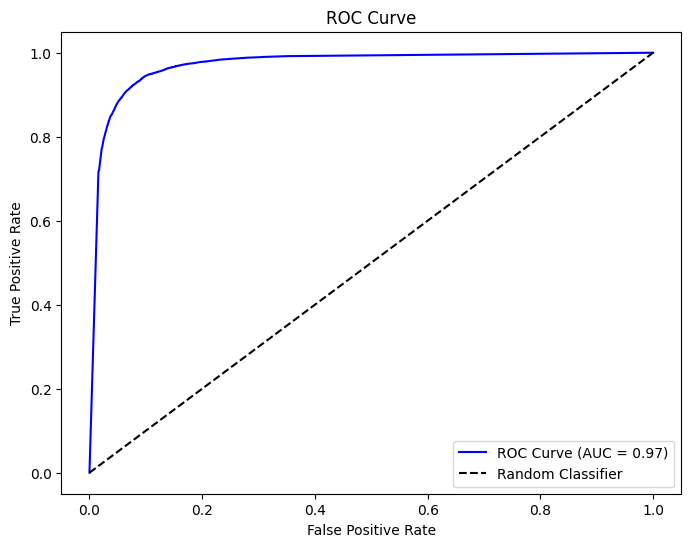

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Plot ROC Curve
fpr, tpr, _ = roc_curve(ytest, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


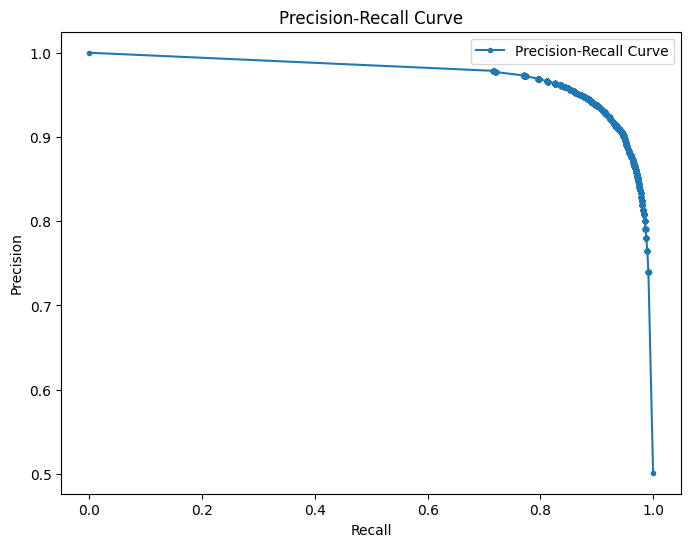

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()
